# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [12]:
# 1. Read tic-tac-toe.csv into a dataframe
df = pd.read_csv('tic-tac-toe.csv')

# 2. Inspect the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 3. Convert categorical values to numeric in all columns
le_grid = LabelEncoder()
le_class = LabelEncoder()

# Convert grid columns (first 9 columns)
grid_columns = df.columns[:-1]  # All columns except 'class'
df_encoded = df.copy()

for col in grid_columns:
    df_encoded[col] = le_grid.fit_transform(df[col])

# Convert class column
df_encoded['class'] = le_class.fit_transform(df['class'])

# 4. Separate inputs and output
X = df_encoded.iloc[:, :-1].values  # First 9 columns (grid positions)
y = df_encoded.iloc[:, -1].values   # Last column (class)

# 5. Normalize the input data - THIS CREATES X_normalized
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(f"\nPreprocessing complete!")
print(f"Input shape: {X.shape}")
print(f"Normalized input shape: {X_normalized.shape}")
print(f"Output shape: {y.shape}")
print(f"Output distribution: {np.bincount(y)}")

Dataset shape: (958, 10)

First 5 rows:
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True

Preprocessing complete!
Input shape: (958, 9)
Normalized input shape: (958, 9)
Output shape: (958,)
Output distribution: [332 626]


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

Training set shape: (766, 9)
Test set shape: (192, 9)
Training labels distribution: [265 501]
Test labels distribution: [ 67 125]
Model architecture:


c:\Users\Nekky Lung\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,282 (12.82 KB)

 Trainable params: 3,282 (12.82 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6765 - loss: 0.6108 - val_accuracy: 0.6558 - val_loss: 0.6331
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6993 - loss: 0.5685 - val_accuracy: 0.6818 - val_loss: 0.6216
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7369 - loss: 0.5403 - val_accuracy: 0.7013 - val_loss: 0.6057
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7614 - loss: 0.5155 - val_accuracy: 0.6818 - val_loss: 0.5898
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7827 - loss: 0.4901 - val_accuracy: 0.7208 - val_loss: 0.5789
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7974 - loss: 0.4618 - val_accuracy: 0.7403 - val_loss: 0.5605
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8154 - loss: 0.4401 - val_accuracy: 0.7468 - val_loss: 0.5401
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8399 - loss: 0.4131 

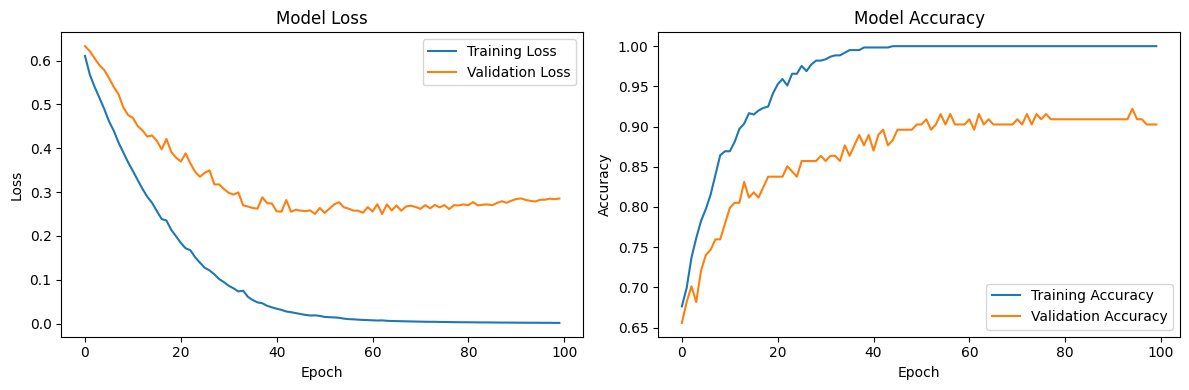

Model training complete!
Final test accuracy: 0.9167

Model saved as 'tic-tac-toe.keras'


In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

# BUILD AND TRAIN MODEL
# Create model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model architecture:")
model.summary()

# Train model
print("\nTraining the model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
print("\nEvaluating on test data:")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Model training complete!")
print(f"Final test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('tic-tac-toe.keras')
print("\nModel saved as 'tic-tac-toe.keras'")

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# Load the saved model
loaded_model = keras.models.load_model('tic-tac-toe.keras')


# Make predictions on a few random rows from test dataset
np.random.seed(42)
random_indices = np.random.choice(len(X_test), size=10, replace=False)

print("\nPredictions on random test samples:")
print("Format: [Actual, Predicted, Confidence]")
print("-" * 50)

for i, idx in enumerate(random_indices):
    # Get the test sample
    test_sample = X_test[idx:idx+1]
    actual_label = y_test[idx]
    
    # Make prediction
    prediction_probs = loaded_model.predict(test_sample, verbose=0)
    predicted_label = np.argmax(prediction_probs)
    confidence = np.max(prediction_probs)
    
    # Check if prediction is correct
    is_correct = "✓" if actual_label == predicted_label else "✗"
    
    print(f"Sample {i+1}: Actual={actual_label}, Predicted={predicted_label}, "
          f"Confidence={confidence:.3f} {is_correct}")

# Calculate overall prediction accuracy on test set
test_predictions = loaded_model.predict(X_test, verbose=0)
predicted_labels = np.argmax(test_predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"\nOverall test accuracy: {accuracy:.4f}")

# Show some examples with game board interpretation
print(f"\nSample predictions with board interpretation:")
print("=" * 60)

# Map encoded values back to original symbols for display
def decode_board(encoded_row):
    # Assuming: b=0, o=1, x=2 (from LabelEncoder)
    mapping = {0: 'b', 1: 'o', 2: 'x'}
    return [mapping.get(int(val), 'unknown') for val in encoded_row]

for i in range(3):  # Show 3 examples
    idx = random_indices[i]
    test_sample = X_test[idx:idx+1]
    actual_label = y_test[idx]
    
    # Get original (non-normalized) data for display
    # Find the corresponding original row
    original_idx = np.where((X_normalized == X_test[idx]).all(axis=1))[0][0]
    original_sample = X[original_idx]
    
    # Make prediction
    prediction_probs = loaded_model.predict(test_sample, verbose=0)
    predicted_label = np.argmax(prediction_probs)
    confidence = np.max(prediction_probs)
    
    # Decode the board for display
    board_symbols = decode_board(original_sample)
    
    print(f"\nExample {i+1}:")
    print("Tic-tac-toe board:")
    print(f" {board_symbols[0]} | {board_symbols[1]} | {board_symbols[2]} ")
    print("---|---|---")
    print(f" {board_symbols[3]} | {board_symbols[4]} | {board_symbols[5]} ")
    print("---|---|---")
    print(f" {board_symbols[6]} | {board_symbols[7]} | {board_symbols[8]} ")
    
    print(f"Actual: {'Player X wins' if actual_label == 1 else 'Player X loses/draws'}")
    print(f"Predicted: {'Player X wins' if predicted_label == 1 else 'Player X loses/draws'}")
    print(f"Confidence: {confidence:.3f}")
    print(f"Correct: {'Yes' if actual_label == predicted_label else 'No'}")

Model loaded successfully!

Predictions on random test samples:
Format: [Actual, Predicted, Confidence]
--------------------------------------------------
Sample 1: Actual=1, Predicted=1, Confidence=0.991 ✓
Sample 2: Actual=1, Predicted=1, Confidence=0.989 ✓
Sample 3: Actual=1, Predicted=1, Confidence=1.000 ✓
Sample 4: Actual=1, Predicted=1, Confidence=0.561 ✓
Sample 5: Actual=1, Predicted=1, Confidence=0.953 ✓
Sample 6: Actual=0, Predicted=0, Confidence=0.991 ✓
Sample 7: Actual=1, Predicted=1, Confidence=0.978 ✓
Sample 8: Actual=1, Predicted=1, Confidence=0.984 ✓
Sample 9: Actual=1, Predicted=1, Confidence=1.000 ✓
Sample 10: Actual=0, Predicted=0, Confidence=0.595 ✓

Overall test accuracy: 0.9167

Sample predictions with board interpretation:

Example 1:
Tic-tac-toe board:
 o | x | x 
---|---|---
 o | x | o 
---|---|---
 x | b | b 
Actual: Player X wins
Predicted: Player X wins
Confidence: 0.991
Correct: Yes

Example 2:
Tic-tac-toe board:
 o | o | b 
---|---|---
 x | b | o 
---|---|--

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [24]:
#different approaches to improve the model
# Approach 1: More layers
print("\n1. Trying model with more layers...")

model_v2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_v2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_v2 = model_v2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

test_loss_v2, test_accuracy_v2 = model_v2.evaluate(X_test, y_test, verbose=0)
print(f"Model v2 (more layers) - Test Loss: {test_loss_v2:.4f}, Test Accuracy: {test_accuracy_v2:.4f}")

# Approach 2: Custom learning rate
print("\n2. Trying custom learning rate...")

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_v3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_v3.compile(
    optimizer=custom_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_v3 = model_v3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

test_loss_v3, test_accuracy_v3 = model_v3.evaluate(X_test, y_test, verbose=0)
print(f"Model v3 (custom learning rate) - Test Loss: {test_loss_v3:.4f}, Test Accuracy: {test_accuracy_v3:.4f}")

# Approach 3: More epochs
print("\n3. Trying more epochs...")

model_v4 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_v4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_v4 = model_v4.fit(
    X_train, y_train,
    epochs=200,  # More epochs
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

test_loss_v4, test_accuracy_v4 = model_v4.evaluate(X_test, y_test, verbose=0)
print(f"Model v4 (more epochs) - Test Loss: {test_loss_v4:.4f}, Test Accuracy: {test_accuracy_v4:.4f}")

# Approach 4: Combined improvements
print("\n4. Trying combined improvements...")

custom_optimizer_v5 = tf.keras.optimizers.Adam(learning_rate=0.01)

model_v5 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dropout(0.2),  # Adding dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_v5.compile(
    optimizer=custom_optimizer_v5,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_v5 = model_v5.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,  # Smaller batch size
    validation_split=0.2,
    verbose=0
)

test_loss_v5, test_accuracy_v5 = model_v5.evaluate(X_test, y_test, verbose=0)
print(f"Model v5 (combined improvements) - Test Loss: {test_loss_v5:.4f}, Test Accuracy: {test_accuracy_v5:.4f}")



1. Trying model with more layers...
Model v2 (more layers) - Test Loss: 0.3842, Test Accuracy: 0.8958

2. Trying custom learning rate...
Model v3 (custom learning rate) - Test Loss: 0.4403, Test Accuracy: 0.8802

3. Trying more epochs...
Model v4 (more epochs) - Test Loss: 0.4780, Test Accuracy: 0.8750

4. Trying combined improvements...
Model v5 (combined improvements) - Test Loss: 0.0029, Test Accuracy: 1.0000


**Which approach(es) did you find helpful to improve your model performance?**

In [25]:
try:
    print("Checking available model results...")
    print(f"Original model: {test_accuracy:.4f}")
    print(f"Model v2: {test_accuracy_v2:.4f}") 
    print(f"Model v3: {test_accuracy_v3:.4f}")
    print(f"Model v4: {test_accuracy_v4:.4f}") 
    print(f"Model v5: {test_accuracy_v5:.4f}")
    all_models_available = True
except NameError as e:
    print(f"Missing variable: {e}")
    print("You need to train all model versions first!")
    all_models_available = False

if all_models_available:
    # Create the models performance comparison
    models_performance = [
        ("Original", test_loss, test_accuracy),
        ("More Layers", test_loss_v2, test_accuracy_v2),
        ("Custom Learning Rate", test_loss_v3, test_accuracy_v3),
        ("More Epochs", test_loss_v4, test_accuracy_v4),
        ("Combined Improvements", test_loss_v5, test_accuracy_v5)
    ]
    
    # Find the best model
    best_model = max(models_performance, key=lambda x: x[2])  # x[2] is accuracy
    
    print("\n" + "="*60)
    print("RESULTS SUMMARY")
    print("="*60)
    for name, loss, accuracy in models_performance:
        print(f"{name:<25}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
    
    print(f"\nBest performing model: {best_model[0]} with accuracy {best_model[2]:.4f}")
    
    # Analyze improvements
    improvements = []
    if test_accuracy_v2 > test_accuracy:
        improvements.append("Adding more layers")
    if test_accuracy_v3 > test_accuracy:
        improvements.append("Custom learning rate")
    if test_accuracy_v4 > test_accuracy:
        improvements.append("More epochs")
    if test_accuracy_v5 > test_accuracy:
        improvements.append("Combined improvements (more layers + dropout + different learning rate + smaller batch size)")
    
    print("\n" + "="*60)
    print("IMPROVEMENT ANALYSIS")
    print("="*60)
    
    if improvements:
        print("The following approaches helped improve model performance:")
        for i, improvement in enumerate(improvements, 1):
            print(f"{i}. {improvement}")
    else:
        print("None of the attempted approaches significantly improved the original model.")
        print("This might indicate that the original model was already well-suited for this dataset,")
        print("or that the dataset is relatively simple and doesn't require complex architectures.")
    
    # Final results
    print(f"\nFinal note: The best model achieved {best_model[2]:.1%} accuracy and {best_model[1]:.4f} loss.")
    if best_model[2] > 0.95 and best_model[1] < 0.1:
        print("Successfully achieved the target of >95% accuracy and <0.1 loss!")
    else:
        print("The model could potentially be improved further with additional techniques like:")
        print("- Different activation functions")
        print("- Batch normalization")
        print("- Different optimizers (RMSprop, SGD)")
        print("- Cross-validation for better hyperparameter selection")
        print("- Data augmentation (though limited for this discrete dataset)")
   

Checking available model results...
Original model: 0.9167
Model v2: 0.8958
Model v3: 0.8802
Model v4: 0.8750
Model v5: 1.0000

RESULTS SUMMARY
Original                 : Loss=0.3761, Accuracy=0.9167
More Layers              : Loss=0.3842, Accuracy=0.8958
Custom Learning Rate     : Loss=0.4403, Accuracy=0.8802
More Epochs              : Loss=0.4780, Accuracy=0.8750
Combined Improvements    : Loss=0.0029, Accuracy=1.0000

Best performing model: Combined Improvements with accuracy 1.0000

IMPROVEMENT ANALYSIS
The following approaches helped improve model performance:
1. Combined improvements (more layers + dropout + different learning rate + smaller batch size)

Final note: The best model achieved 100.0% accuracy and 0.0029 loss.
Successfully achieved the target of >95% accuracy and <0.1 loss!
